In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
file_path = "./cifar-10-batches-py/"
dictTrain = file_path + "data_batch_1"
with open(dictTrain, 'rb') as fo:
    dict = pickle.load(fo, encoding='latin1')
dictTrain = dict
dataTrain = dictTrain['data']
labelTrain = dictTrain['labels']
for i in range(2,6):
    dictTrain = file_path+"data_batch_"+str(i)
    with open(dictTrain, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    dictTrain = dict    
    dataTrain = np.vstack([dataTrain, dictTrain['data']])
    labelTrain = np.hstack([labelTrain, dictTrain['labels']])

dictTest = file_path + "test_batch"
with open(dictTest, 'rb') as fo:
    dict = pickle.load(fo, encoding='latin1')

dictTest = dict

dataTest = dictTest['data']
labelTest = dictTest['labels']
labelTest = np.array(labelTest)

In [3]:
#L1
X_train, y_train = dataTrain[:1000,:] , labelTrain[:1000]
num_folds = 5
k_choices = [1, 5, 8, 10, 15, 20, 30, 50, 70, 100]
k_accuracy = {}
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
print("length of x_train_folds", len(X_train_folds))
print("X_train length", X_train_folds[0].shape)

length of x_train_folds 5
X_train length (200, 3072)


In [10]:
for k in k_choices:
    k_accuracy[k] = []
    for index in range(num_folds):
        X_te = X_train_folds[index]
        y_te = y_train_folds[index]
        
        X_tr = np.reshape( np.array(X_train_folds[:index] + X_train_folds[index + 1:]),
                                (int(X_train.shape[0] * (num_folds - 1) / num_folds), -1) )
        y_tr = np.reshape(y_train_folds[:index] + y_train_folds[index + 1:],
                              int(X_train.shape[0] * (num_folds - 1) / num_folds))
        
        
        dists = np.zeros((X_te.shape[0],X_tr.shape[0]))

        for i in range(X_te.shape[0]):
            dists[i] = np.sum( np.abs(X_tr- X_te[i]), axis=1)        
        
        y_pred = np.zeros(dists.shape[0])
        for i in range(dists.shape[0]):            
            closest_y = y_tr[np.argsort(dists[i, :])[:k]]            
            y_pred[i] = np.argmax(np.bincount(closest_y))
        
        
        y_te_pred = y_pred
        accuracy = np.mean(y_te_pred == y_te)
        k_accuracy[k].append(accuracy)
   
print("For L1 Graph")
for k, accuracylist in k_accuracy.items():
    for accuracy in accuracylist:
        print("k = %d, accuracy = %.3f" % (k, accuracy))

For L1 Graph
k = 1, accuracy = 0.135
k = 1, accuracy = 0.155
k = 1, accuracy = 0.235
k = 1, accuracy = 0.210
k = 1, accuracy = 0.245
k = 5, accuracy = 0.110
k = 5, accuracy = 0.125
k = 5, accuracy = 0.215
k = 5, accuracy = 0.190
k = 5, accuracy = 0.205
k = 8, accuracy = 0.125
k = 8, accuracy = 0.135
k = 8, accuracy = 0.205
k = 8, accuracy = 0.195
k = 8, accuracy = 0.150
k = 10, accuracy = 0.145
k = 10, accuracy = 0.160
k = 10, accuracy = 0.205
k = 10, accuracy = 0.195
k = 10, accuracy = 0.185
k = 15, accuracy = 0.130
k = 15, accuracy = 0.140
k = 15, accuracy = 0.205
k = 15, accuracy = 0.210
k = 15, accuracy = 0.210
k = 20, accuracy = 0.110
k = 20, accuracy = 0.150
k = 20, accuracy = 0.210
k = 20, accuracy = 0.205
k = 20, accuracy = 0.205
k = 30, accuracy = 0.100
k = 30, accuracy = 0.145
k = 30, accuracy = 0.195
k = 30, accuracy = 0.195
k = 30, accuracy = 0.200
k = 50, accuracy = 0.115
k = 50, accuracy = 0.130
k = 50, accuracy = 0.170
k = 50, accuracy = 0.190
k = 50, accuracy = 0.160
k 

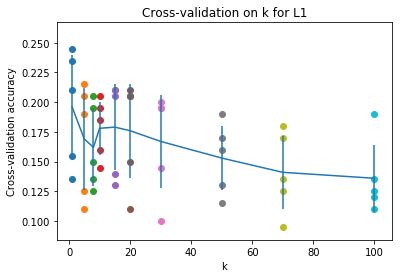

In [11]:
for k in k_choices:
    accuracies = k_accuracy[k]
    plt.scatter([k] * len(accuracies), accuracies)
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_accuracy.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_accuracy.items())])
    
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k for L1')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [12]:
#L2
X_train, y_train = dataTrain[:1000,:] , labelTrain[:1000]
num_folds = 5
k_choices = [1, 5, 8, 10, 15, 20, 30, 50, 70, 100]
k_accuracy = {}
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
print("length of x_train_folds", len(X_train_folds))
print("X_train len", X_train_folds[0].shape)

length of x_train_folds 5
X_train len (200, 3072)


In [13]:
for k in k_choices:
    k_accuracy[k] = []
    for index in range(num_folds):
        X_te = X_train_folds[index]
        y_te = y_train_folds[index]
        
        X_tr = np.reshape( np.array(X_train_folds[:index] + X_train_folds[index + 1:]),
                                (int(X_train.shape[0] * (num_folds - 1) / num_folds), -1) )
        y_tr = np.reshape(y_train_folds[:index] + y_train_folds[index + 1:],
                              int(X_train.shape[0] * (num_folds - 1) / num_folds))
        
        
        dists = np.zeros((X_te.shape[0], X_tr.shape[0]))

        value_2xy = np.multiply(X_te.dot(X_tr.T), -2)
        value_x2 = np.sum(np.square(X_te), axis=1, keepdims=True)
        value_y2 = np.sum(np.square(X_tr), axis=1)
        dists = value_2xy + value_x2 + value_y2   
    
        
        y_pred = np.zeros(dists.shape[0])
        for i in range(dists.shape[0]):            
            closest_y = y_tr[np.argsort(dists[i, :])[:k]]            
            y_pred[i] = np.argmax(np.bincount(closest_y))
        
        
        y_te_pred = y_pred
        accuracy = np.mean(y_te_pred == y_te)
        k_accuracy[k].append(accuracy)
  
print("For L2 Graph")
for k, accuracylist in k_accuracy.items():
    for accuracy in accuracylist:
        print("k = %d, accuracy = %.3f" % (k, accuracy))

For L2 Graph
k = 1, accuracy = 0.110
k = 1, accuracy = 0.055
k = 1, accuracy = 0.115
k = 1, accuracy = 0.140
k = 1, accuracy = 0.125
k = 5, accuracy = 0.070
k = 5, accuracy = 0.105
k = 5, accuracy = 0.110
k = 5, accuracy = 0.140
k = 5, accuracy = 0.085
k = 8, accuracy = 0.070
k = 8, accuracy = 0.105
k = 8, accuracy = 0.110
k = 8, accuracy = 0.140
k = 8, accuracy = 0.085
k = 10, accuracy = 0.070
k = 10, accuracy = 0.105
k = 10, accuracy = 0.110
k = 10, accuracy = 0.140
k = 10, accuracy = 0.085
k = 15, accuracy = 0.070
k = 15, accuracy = 0.105
k = 15, accuracy = 0.105
k = 15, accuracy = 0.060
k = 15, accuracy = 0.085
k = 20, accuracy = 0.070
k = 20, accuracy = 0.140
k = 20, accuracy = 0.105
k = 20, accuracy = 0.060
k = 20, accuracy = 0.085
k = 30, accuracy = 0.070
k = 30, accuracy = 0.105
k = 30, accuracy = 0.110
k = 30, accuracy = 0.060
k = 30, accuracy = 0.085
k = 50, accuracy = 0.070
k = 50, accuracy = 0.105
k = 50, accuracy = 0.105
k = 50, accuracy = 0.060
k = 50, accuracy = 0.085
k 

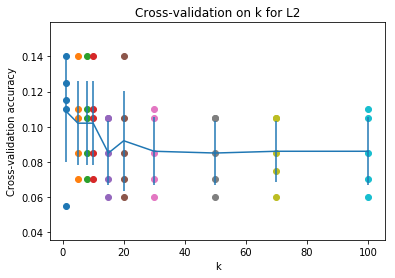

In [14]:
for k in k_choices:
    accuracies = k_accuracy[k]
    plt.scatter([k] * len(accuracies), accuracies)
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_accuracy.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_accuracy.items())])
    
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k for L2 ')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()